### Nathan Reed¶
### Project Milestone 5
### Prof. Williams
### 08/12/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import csv

# Getting All CSV Files In

In [83]:
college_players_df = pd.read_csv('collegebasketball.csv')
draft_df = pd.read_csv('draft_data.csv')
nba_list = pd.read_csv('nba_list.csv')

# Using SQLITE to Combine All Tables

In [40]:
connection = sqlite3.connect('basketball.db')
college_players_df.to_sql('cbb', connection, if_exists='replace')
draft_df.to_sql('draft', connection, if_exists='replace')
nba_list.to_sql('nba', connection, if_exists='replace')
cursor = connection.cursor()

In [34]:
def merged():
    cursor.execute('CREATE TABLE table5 AS SELECT * FROM cbb t1 Left JOIN nba t2 ON t1.player_name = t2.Player')
    for line in cursor.fetchall():
        print(line)
merged()

In [47]:
def merged1():
    cursor.execute('CREATE TABLE table7 AS SELECT * FROM table5 t1 Left JOIN draft t2 ON t1.player_name = t2."prospect.name"')
    for line in cursor.fetchall():
        print(line)
merged1()

In [78]:
basketball_table = pd.read_sql(""" SELECT * FROM table7""", connection)
basketball_table.head(10)

,index,Unnamed: 0,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,index:1,Unnamed: 0:1,Player,Game,Games Started,Minutes Played,Field Goals,Field Goals Attempted,Three Point Field Goals,Three Pointers Attempted,Two Point Field Goals,Two Pointers Attempted,Free Throws Made,Free Throws Attempted,Offensive Rebounds,Defensive Rebounds,Total Rebounds,Assists,Steals,Blocks,Turnovers,Personal Fouls,Points,index:2,Unnamed: 0:2,overall,team.name,team.market,team.alias,prospect.first_name,prospect.last_name,prospect.name,prospect.position,prospect.height,prospect.weight,prospect.experience,prospect.team_name
0,0,0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,10,14,0.714,26,68,0.382,13,39,0.333,0.3,1.5,13.1,So,2-Jun,0.258086,89.3938,2.5,2009,2,0.0,1.823646,108.3210,108.5270,0.893017,49.9644,-4.995140,-1.623360,-3.371780,-4.723150,14.5769,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None
1,1,1,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,45,67,0.672,67,157,0.427,50,154,0.325,0.0,0.9,21.5,Sr,4-Jun,2.274070,104.1070,1.7,2009,5,0.0,1.081662,107.5560,102.1540,2.763870,115.0210,0.003161,1.024770,-1.021610,0.665065,33.1852,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None
2,2,2,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,14,27,0.519,25,63,0.397,28,62,0.452,0.8,1.9,21.6,Sr,4-Jun,0.552857,93.2086,2.0,2009,8,0.0,0.942830,108.8580,106.5560,1.218710,84.1698,-0.977798,-0.502574,-0.475224,-0.736233,17.9667,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None
3,3,3,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,64,114,0.561,93,176,0.528,0,0,0.000,1.9,1.3,64.8,Sr,8-Jun,1.060130,97.8554,3.8,2009,9,0.0,0.491229,101.0520,100.7240,1.992790,128.0280,-1.836060,-1.946040,0.109983,-2.353180,22.9091,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,82.0,82.0,Anthony Brown,52.0,11.0,921.0,76.0,227.0,35.0,125.0,41.0,102.0,17.0,20.0,25.0,111.0,136.0,36.0,24.0,7.0,27.0,64.0,204.0,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None
4,4,4,Justin Drummond,Wagner,NEC,30,82.8,99.7,20.5,48.8,53.07,2.9,13.9,25.5,23.9,76,109,0.697,82,187,0.439,25,58,0.431,2.6,3.1,44.5,Sr,6-Jun,1.399390,96.4402,2.1,2009,18,0.0,1.493946,97.5982,104.3750,2.516660,204.4940,0.567700,-0.665147,1.232850,1.170260,33.2667,0.250984,0.919272,0.8000,3.9333,4.7333,4.1333,1.7333,0.8000,10.5000,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None
5,5,5,Jamal Smith,Wagner,NEC,30,80.4,92.5,23.0,43.5,45.29,6.4,12.6,11.9,14.5,64,120,0.533,128,281,0.456,12,55,0.218,0.3,2.3,35.7,Sr,5-Jun,0.881212,92.1620,2.4,2009,20,17.2,0.945454,101.0070,108.0200,2.036640,172.9700,-3.658810,-1.925920,-1.732890,-3.805610,32.3000,-1.892540,-1.913070,1.7333,3.4667,5.2000,1.7333,1.2333,0.1000,11.8667,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,NaN,NaN,None,None
6,6,6,Tyrell Biggs,Pittsburgh,BE,34,57.9,113.9,13.7,55.3,56.37,9.8,10.8,4.9,18.7,22,34,0.647,72,136,0.529,18,43,0.419,2.1,1.0,19.0,Sr,8-Jun,2.051430,109.0820,3.9,

I know have all the data combined into one data set/table.

# Visualization

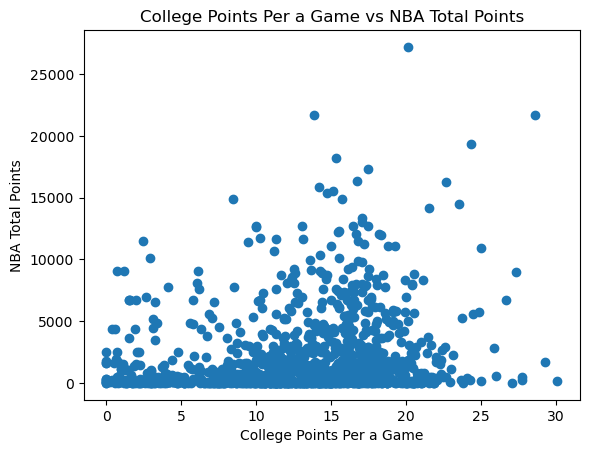

In [82]:
plt.scatter(basketball_table['pts'], basketball_table['Points'])
plt.title("College Points Per a Game vs NBA Total Points")
plt.xlabel("College Points Per a Game")
plt.ylabel("NBA Total Points")
plt.show()

As we can tell from this graph there is no real correlation between college points per a game and NBA total points. 

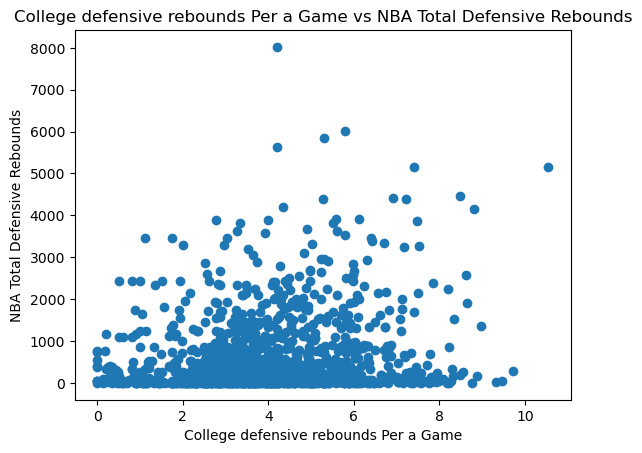

In [84]:
plt.scatter(basketball_table['dreb'], basketball_table['Defensive Rebounds'])
plt.title("College defensive rebounds Per a Game vs NBA Total Defensive Rebounds")
plt.xlabel("College defensive rebounds Per a Game")
plt.ylabel("NBA Total Defensive Rebounds")
plt.show()

Again, as we can tell from this graph there is no real correlation between college defensive rebounds per a game and NBA total defensive rebounds.

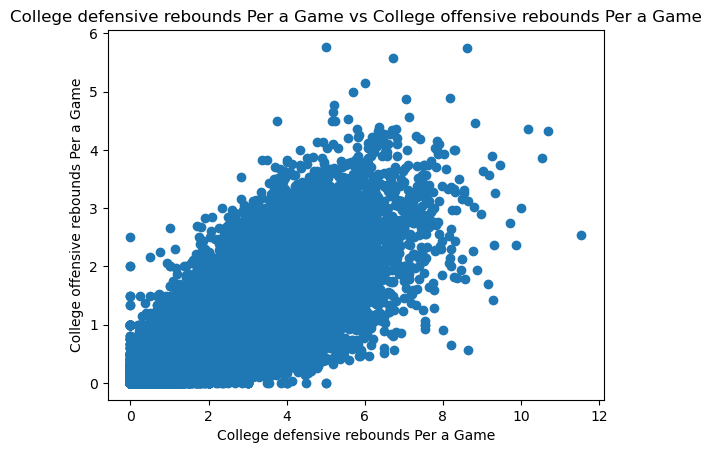

In [85]:
plt.scatter(basketball_table['dreb'], basketball_table['oreb'])
plt.title("College defensive rebounds Per a Game vs College offensive rebounds Per a Game")
plt.xlabel("College defensive rebounds Per a Game")
plt.ylabel("College offensive rebounds Per a Game")
plt.show()

We can tell from this graph that typically if you have average more defensive rebounds that you will have more offensive rebounds. this makes a lot of sense as it is typically the same players that average great rebounding stats for offense and defense.

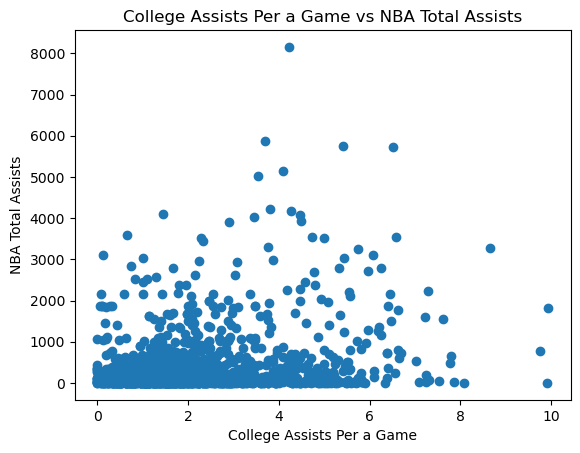

In [86]:
plt.scatter(basketball_table['ast'], basketball_table['Assists'])
plt.title("College Assists Per a Game vs NBA Total Assists")
plt.xlabel("College Assists Per a Game")
plt.ylabel("NBA Total Assists")
plt.show()

While there is no correlation between college assists per a game and NBA total assists, it appears that the more assists you have  per a game in college, the more variance you will have in the nba for assists.

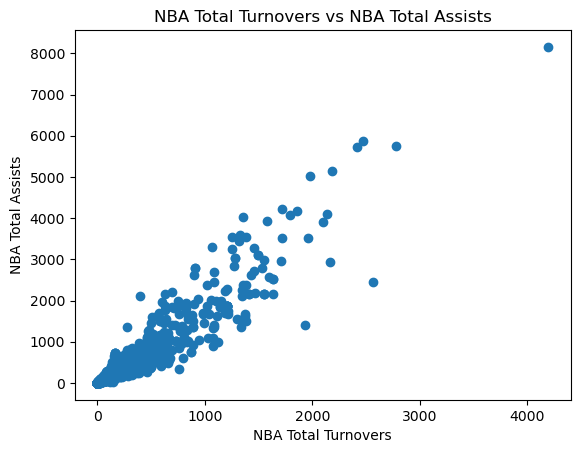

In [87]:
plt.scatter(basketball_table['Turnovers'], basketball_table['Assists'])
plt.title("NBA Total Turnovers vs NBA Total Assists")
plt.xlabel("NBA Total Turnovers")
plt.ylabel("NBA Total Assists")
plt.show()

From this graph we can tell that as turnovers increase typically your assists increase. That makes sense as the people who pass the ball the most will typically have the most assists and the most turnovers.

# Summary on Project

I have been able to learn lot from this project. One of the many things I have learned is how to get an API into jupyter notebook. I struggled greatly with this part as it definitely took the most time to figure out for me. The API that I used boasted of having lots of data on all things sports. I then while working on that section of the project realized they only have had the last four years of draft data. This greatly limited my plan for my project and made some of the data a lot less interpretable as I did not have as much data as I wanted. From this experience I learned to make sure that data has everything I need than just take a quick glance at it and think that it does. However, I was able to find answers to many of the questions that I had and they all made sense for the most part. The last big thing that I learned was how to use SQL and to join data. I have had very little exposure to SQL and this part of the project taught me the ease of combing the data. There are also some ethical implication with some of the things that I did throughout this project. For certain parts of the data I had missing values and I had to decide how to best replace that. For averages with certain values, I had to be okay with changing NAN to 0 due to the fact that this would normally be undefined. So there are certain values that would have a lower weight than 0 but now have a value as 0. Overall, this is not a serious change as this is very typical on most websites for sports. If I had the perfect data, this would let NBA owners know what players to draft and that would lead to certain players not being drafted that do not fit this mold. This would affect those players and maybe lead to less diversity of player type in the NBA. Other than that I do not see any other ethical implications.